In [249]:
from sklearn.datasets import fetch_california_housing
import joblib
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.utils import shuffle

from scipy.stats import norm
%matplotlib inline 

from pickle import load,dump

import seaborn as sns
from sklearn.model_selection import validation_curve,learning_curve
from sklearn.tree import DecisionTreeRegressor


In [34]:
X, y = fetch_california_housing(return_X_y=True)

## Task 2.3.1. Analyse the relationship between the latitude,longitude and median house value

In [35]:
print(X.shape)

(20640, 8)


In [4]:
feature_names = fetch_california_housing().feature_names

In [5]:
print(feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [6]:
california = pd.DataFrame(X, columns=feature_names)

In [7]:
#get an overview of the dataset, check whether there's any missing values within the dataset
california.info()
california.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24


In [8]:
california.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


## Plotting the longitude and latitude, colouring the points according to the median house value

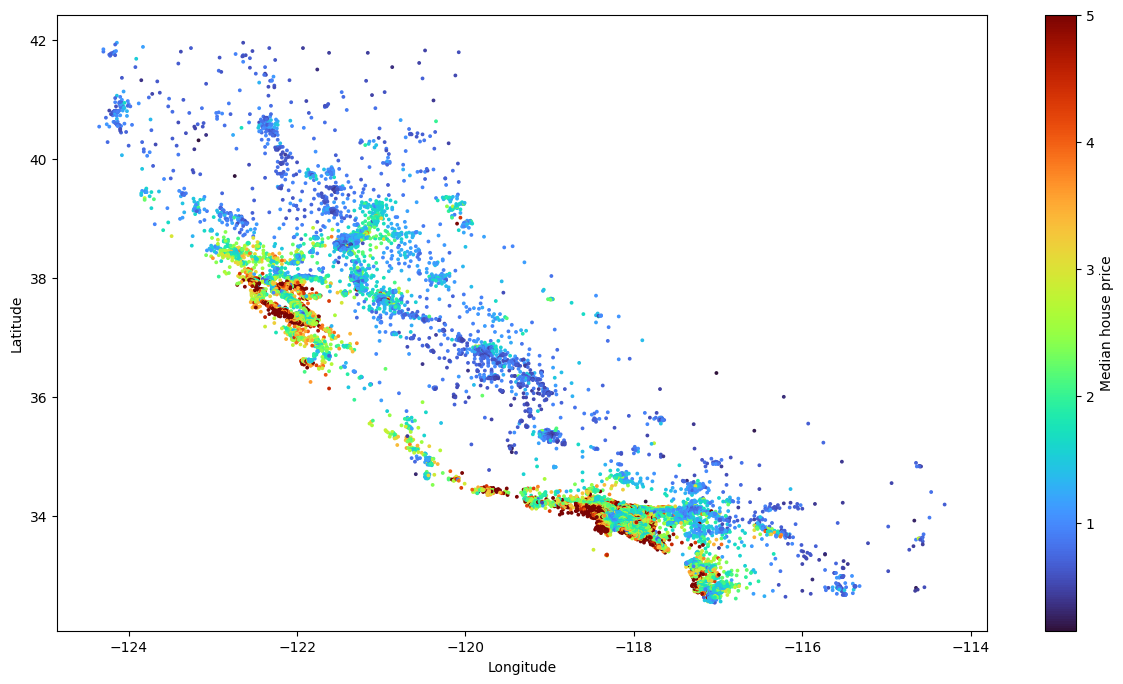

In [9]:
plt.figure(figsize=(15, 8))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.scatter(california.Longitude,california.Latitude, c = y, s = 3,cmap='turbo')
plt.colorbar().set_label('Median house price')

## Task 2.3.2. Analysing the dataset and deciding whether it needs cleaning and/or transformation of the features

In [10]:
#Dataset is not shuffled; the latitude and longitude are shown sorted. To avoid biases, data needs to be shuffled

#TODO:
    #Append the ys to the data frame before shuffling
    #Shuffle and store in new variable
    #Replace old y with shuffled y from appended column

california['Med_House_Val'] = y

shuffled_ds = california.sample(frac = 1)

shuffled_ds.head()

newY = california['Med_House_Val']


In [11]:
scaler = StandardScaler().fit(california)
X_scaled = scaler.transform(california)



In [12]:
X_scaled = pd.DataFrame(X_scaled[:,:8], columns=feature_names)


In [13]:
X_scaled.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,6.609700e-17,5.508083e-18,6.609700e-17,-1.060306e-16,-1.101617e-17,3.442552e-18,-1.079584e-15,-8.526513e-15
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-1.774299e+00,-2.196180e+00,-1.852319e+00,-1.610768e+00,-1.256123e+00,-2.290000e-01,-1.447568e+00,-2.385992e+00
25%,-6.881186e-01,-8.453931e-01,-3.994496e-01,-1.911716e-01,-5.638089e-01,-6.171062e-02,-7.967887e-01,-1.113209e+00
50%,-1.767951e-01,2.864572e-02,-8.078489e-02,-1.010650e-01,-2.291318e-01,-2.431585e-02,-6.422871e-01,5.389137e-01
75%,4.593063e-01,6.643103e-01,2.519615e-01,6.015869e-03,2.644949e-01,2.037453e-02,9.729566e-01,7.784964e-01
max,5.858286e+00,1.856182e+00,5.516324e+01,6.957171e+01,3.025033e+01,1.194191e+02,2.958068e+00,2.625280e+00


## Runnning Bayesian Linear Regression

In [14]:
import pymc as pm
import arviz as az

WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [15]:
##Code taken from third lab
model = pm.Model()



with model:
    # Defining our priors
    w0 = pm.Normal('w0', mu=0, sigma=40)
    w1 = pm.Normal('w1', mu=0, sigma=40)
    w2 = pm.Normal('w2', mu=0, sigma=40)
    w3 = pm.Normal('w3', mu=0, sigma=40)
    w4 = pm.Normal('w4', mu=0, sigma=40)
    w5 = pm.Normal('w5', mu=0, sigma=40)
    w6 = pm.Normal('w6', mu=0, sigma=40)
    w7 = pm.Normal('w7', mu=0, sigma=40)
    w8 = pm.Normal('w8', mu=0, sigma=40)
    
    sigma = pm.Uniform('sigma', lower=0, upper=20)

    y_est = w0 + w1*X_scaled.MedInc + w2*X_scaled.HouseAge + w3*X_scaled.AveRooms + w4 *X_scaled.AveBedrms + w5 * X_scaled.Population+w6*X_scaled.AveOccup + w7*X_scaled.Latitude + w8*X_scaled.Longitude # auxiliary variables

    likelihood = pm.Normal('y', mu=y_est, sigma=sigma, observed=newY)
    
    # inference
    sampler = pm.NUTS() # Hamiltonian MCMC with No U-Turn Sampler 
    # or alternatively
    #sampler = pm.Metropolis()
    
    idata = pm.sample(X.shape[0], sampler, progressbar=True, cores=None, chains=2)
    

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [w0, w1, w2, w3, w4, w5, w6, w7, w8, sigma]


Sampling 2 chains for 1_000 tune and 20_640 draw iterations (2_000 + 41_280 draws total) took 355 seconds.


In [742]:
az.summary(idata, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
w0,2.07,0.01,2.06,2.08,0.0,0.0,44342.78,28094.45,1.0
w1,0.83,0.01,0.81,0.84,0.0,0.0,24558.54,29464.98,1.0
w2,0.12,0.01,0.11,0.13,0.0,0.0,41916.10,30946.63,1.0
w3,-0.27,0.01,-0.29,-0.24,0.0,0.0,21950.03,26086.70,1.0
w4,0.31,0.01,0.28,0.33,0.0,0.0,23165.22,26974.64,1.0
w5,-0.00,0.01,-0.01,0.01,0.0,0.0,47233.55,29983.37,1.0
w6,-0.04,0.01,-0.05,-0.03,0.0,0.0,52985.91,29864.23,1.0
w7,-0.90,0.02,-0.93,-0.87,0.0,0.0,26492.16,26970.42,1.0
w8,-0.87,0.02,-0.90,-0.84,0.0,0.0,27649.33,27477.41,1.0
sigma,0.72,0.00,0.72,0.73,0.0,0.0,52814.96,28797.46,1.0


In [47]:
X_scaled.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,6.609700e-17,5.508083e-18,6.609700e-17,-1.060306e-16,-1.101617e-17,3.442552e-18,-1.079584e-15,-8.526513e-15
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-1.774299e+00,-2.196180e+00,-1.852319e+00,-1.610768e+00,-1.256123e+00,-2.290000e-01,-1.447568e+00,-2.385992e+00
25%,-6.881186e-01,-8.453931e-01,-3.994496e-01,-1.911716e-01,-5.638089e-01,-6.171062e-02,-7.967887e-01,-1.113209e+00
50%,-1.767951e-01,2.864572e-02,-8.078489e-02,-1.010650e-01,-2.291318e-01,-2.431585e-02,-6.422871e-01,5.389137e-01
75%,4.593063e-01,6.643103e-01,2.519615e-01,6.015869e-03,2.644949e-01,2.037453e-02,9.729566e-01,7.784964e-01
max,5.858286e+00,1.856182e+00,5.516324e+01,6.957171e+01,3.025033e+01,1.194191e+02,2.958068e+00,2.625280e+00


## Saving pymc model

In [23]:
with open('idata_var','wb') as file:
    dump(idata,file)

In [25]:
iidata = pd.read_pickle(r'idata_var')

In [57]:
az.summary(iidata,round_to=4)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
w0,2.0686,0.0050,2.0590,2.0779,0.0000,0.0000,44342.7766,28094.4528,1.0000
w1,0.8296,0.0079,0.8147,0.8446,0.0001,0.0000,24558.5396,29464.9814,1.0000
w2,0.1188,0.0056,0.1085,0.1294,0.0000,0.0000,41916.0968,30946.6264,1.0000
w3,-0.2656,0.0144,-0.2934,-0.2391,0.0001,0.0001,21950.0335,26086.6956,1.0001
w4,0.3058,0.0132,0.2812,0.3309,0.0001,0.0001,23165.2157,26974.6430,1.0001
w5,-0.0045,0.0054,-0.0144,0.0057,0.0000,0.0000,47233.5535,29983.3712,1.0000
w6,-0.0393,0.0050,-0.0489,-0.0300,0.0000,0.0000,52985.9120,29864.2321,1.0000
w7,-0.9000,0.0154,-0.9285,-0.8706,0.0001,0.0001,26492.1623,26970.4182,1.0001
w8,-0.8705,0.0151,-0.8983,-0.8417,0.0001,0.0001,27649.3298,27477.4097,1.0000
sigma,0.7243,0.0035,0.7176,0.7309,0.0000,0.0000,52814.9589,28797.4557,1.0000


In [ ]:
az.plot_trace(idata,legend=True,combined=False)

array([[<AxesSubplot: title={'center': 'w0'}>,
        <AxesSubplot: title={'center': 'w1'}>,
        <AxesSubplot: title={'center': 'w2'}>],
       [<AxesSubplot: title={'center': 'w3'}>,
        <AxesSubplot: title={'center': 'w4'}>,
        <AxesSubplot: title={'center': 'w5'}>],
       [<AxesSubplot: title={'center': 'w6'}>,
        <AxesSubplot: title={'center': 'w7'}>,
        <AxesSubplot: title={'center': 'w8'}>],
       [<AxesSubplot: title={'center': 'sigma'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

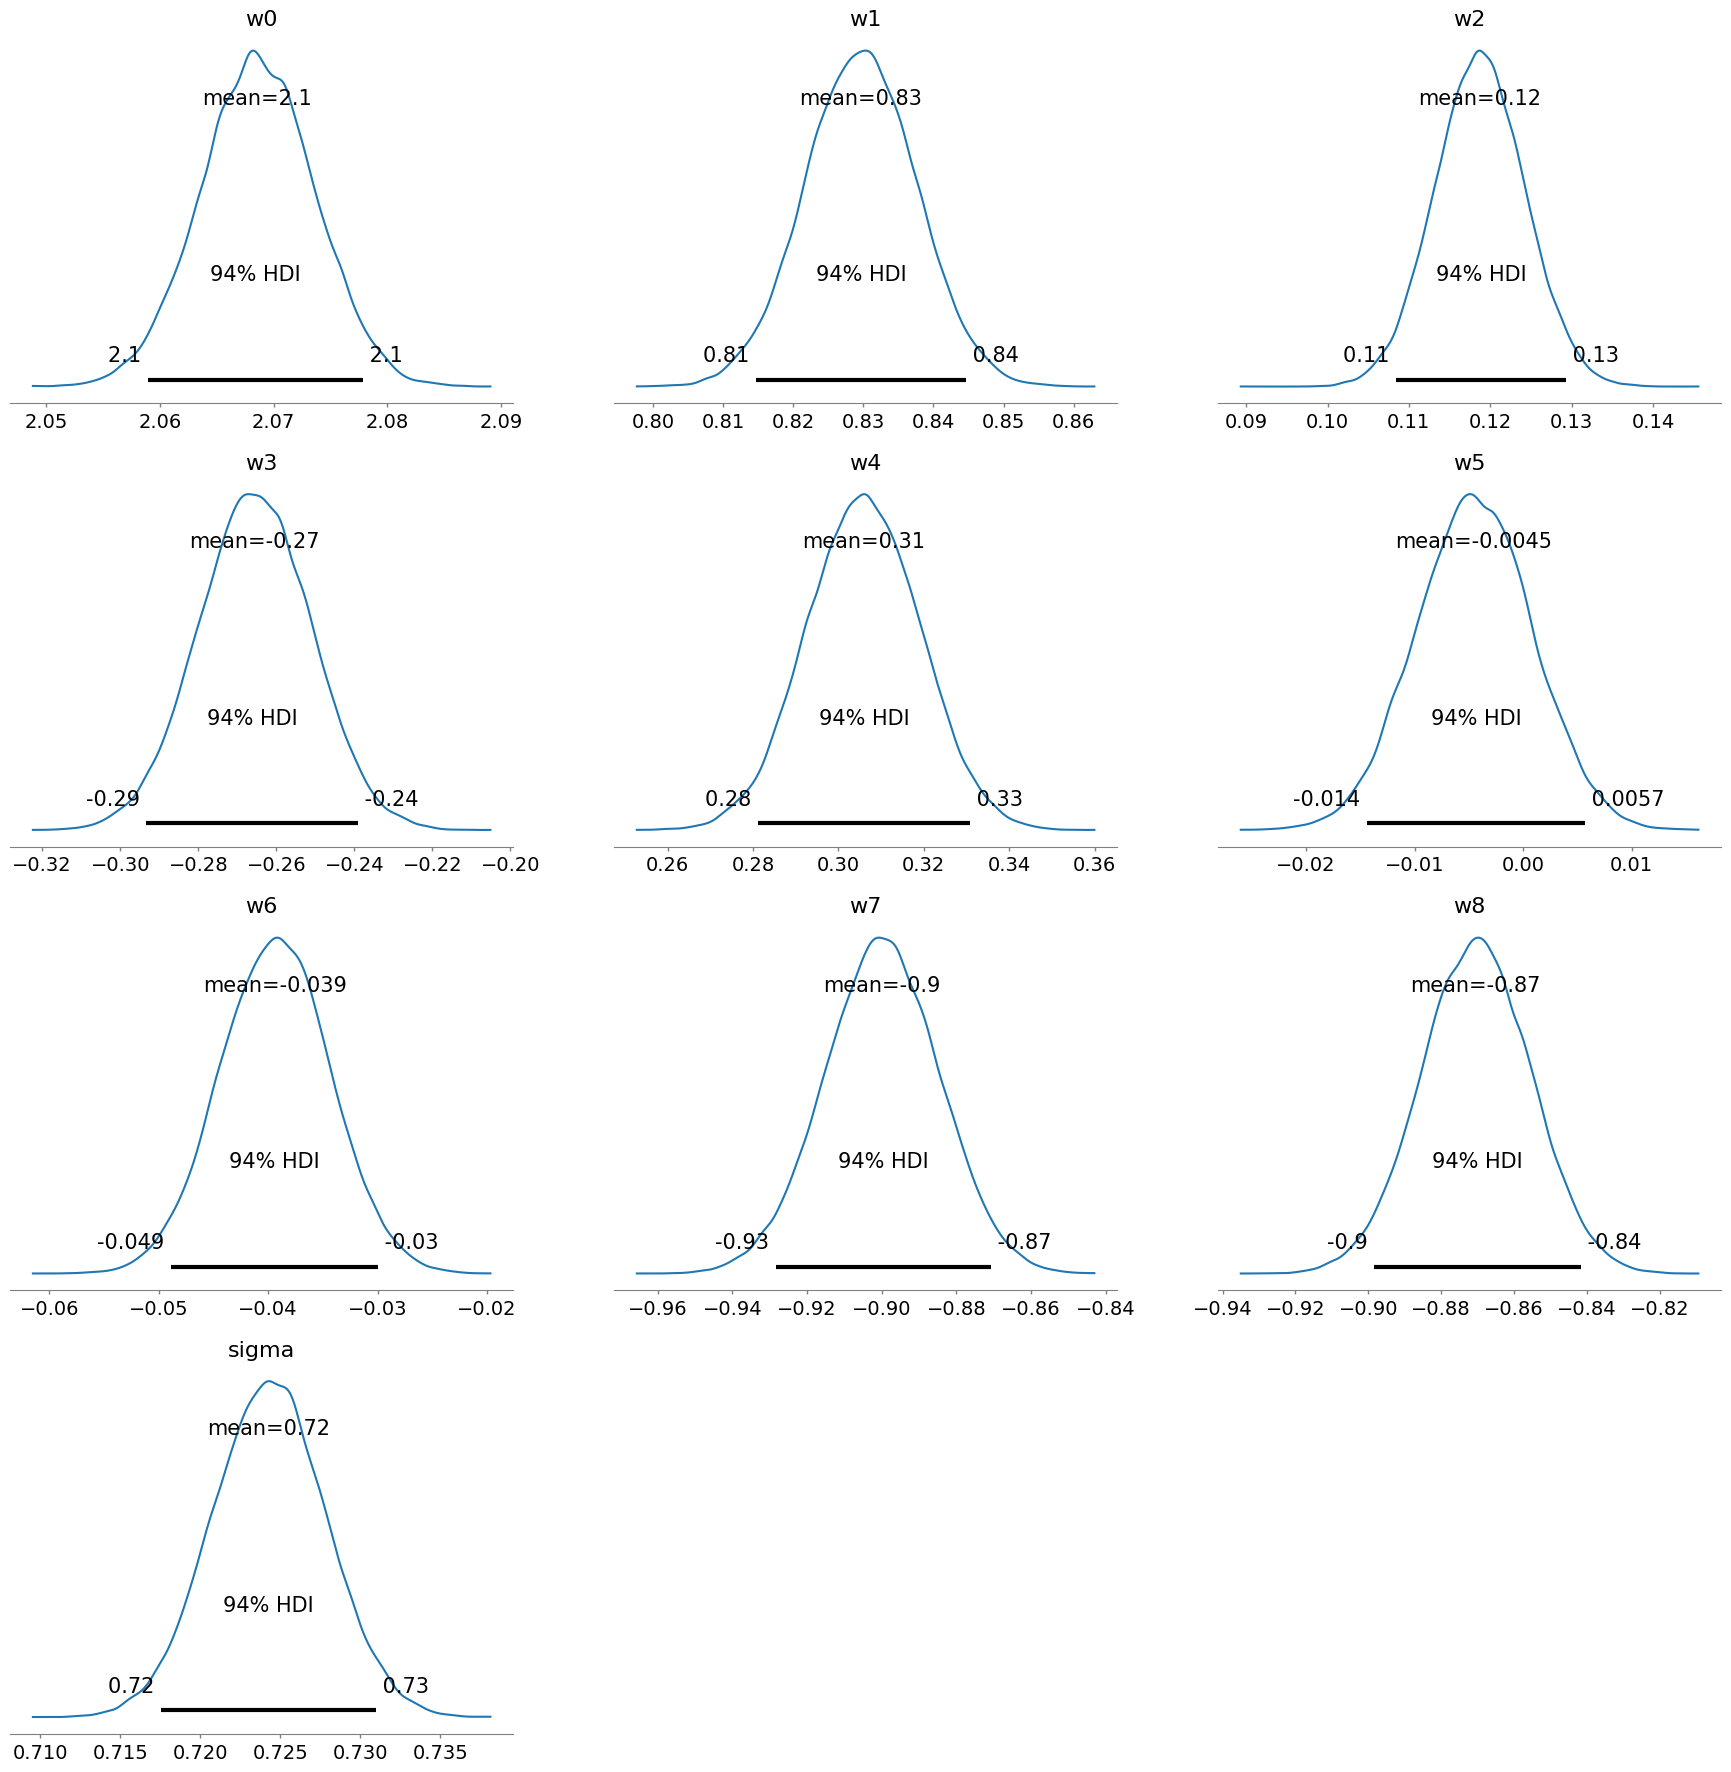

In [45]:
az.plot_posterior(idata)

## Running the model with just 50 samples

In [224]:
##code adapted from third lab
model_50 = pm.Model()



with model_50:
    # Defining our priors
    w0 = pm.Normal('w0', mu=0, sigma=40)
    w1 = pm.Normal('w1', mu=0, sigma=40)
    w2 = pm.Normal('w2', mu=0, sigma=40)
    w3 = pm.Normal('w3', mu=0, sigma=40)
    w4 = pm.Normal('w4', mu=0, sigma=40)
    w5 = pm.Normal('w5', mu=0, sigma=40)
    w6 = pm.Normal('w6', mu=0, sigma=40)
    w7 = pm.Normal('w7', mu=0, sigma=40)
    w8 = pm.Normal('w8', mu=0, sigma=40)
    
    sigma = pm.Uniform('sigma', lower=0, upper=20)

    y_est = w0 + w1*X_scaled.MedInc + w2*X_scaled.HouseAge + w3*X_scaled.AveRooms + w4 *X_scaled.AveBedrms + w5 * X_scaled.Population+w6*X_scaled.AveOccup + w7*X_scaled.Latitude + w8*X_scaled.Longitude # auxiliary variables

    likelihood = pm.Normal('y', mu=y_est, sigma=sigma, observed=newY)
    
    # inference
    sampler = pm.NUTS() # Hamiltonian MCMC with No U-Turn Sampler 
    # or alternatively
    #sampler = pm.Metropolis()
    
    idata_50 = pm.sample(50, sampler, progressbar=True, cores=None, chains=2)

Only 50 samples in chain.
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [w0, w1, w2, w3, w4, w5, w6, w7, w8, sigma]


Sampling 2 chains for 1_000 tune and 50 draw iterations (2_000 + 100 draws total) took 38 seconds.
C:\Users\Tudor\AppData\Local\Temp\ipykernel_175340\3909357261.py:28: UserWarning: The number of samples is too small to check convergence reliably.
  idata_50 = pm.sample(50, sampler, progressbar=True, cores=None, chains=2)


In [243]:
az.summary(idata_50,round_to=4)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
w0,2.0694,0.0048,2.0595,2.0769,0.0006,0.0004,67.4155,57.6991,1.0057
w1,0.8297,0.0078,0.8158,0.8444,0.0014,0.0010,38.3319,78.0984,1.0539
w2,0.1192,0.0050,0.1083,0.1264,0.0005,0.0004,86.8261,81.1696,0.9897
w3,-0.2657,0.0142,-0.2910,-0.2351,0.0020,0.0014,55.0649,71.6995,1.0542
w4,0.3059,0.0130,0.2750,0.3281,0.0029,0.0021,23.4114,71.6995,1.0854
w5,-0.0035,0.0044,-0.0119,0.0056,0.0003,0.0004,158.1681,75.2925,1.0122
w6,-0.0397,0.0051,-0.0510,-0.0317,0.0005,0.0003,111.8799,99.0511,0.9951
w7,-0.8981,0.0135,-0.9236,-0.8709,0.0019,0.0013,52.1825,80.5222,1.0188
w8,-0.8702,0.0140,-0.9004,-0.8475,0.0020,0.0014,44.5984,70.2489,1.0141
sigma,0.7245,0.0037,0.7178,0.7312,0.0005,0.0003,58.9234,77.5311,1.0225


## Running model with 500 samples

In [240]:
##code adapted from third lab
model_500 = pm.Model()



with model_500:
    # Defining our priors
    w0 = pm.Normal('w0', mu=0, sigma=40)
    w1 = pm.Normal('w1', mu=0, sigma=40)
    w2 = pm.Normal('w2', mu=0, sigma=40)
    w3 = pm.Normal('w3', mu=0, sigma=40)
    w4 = pm.Normal('w4', mu=0, sigma=40)
    w5 = pm.Normal('w5', mu=0, sigma=40)
    w6 = pm.Normal('w6', mu=0, sigma=40)
    w7 = pm.Normal('w7', mu=0, sigma=40)
    w8 = pm.Normal('w8', mu=0, sigma=40)
    
    sigma = pm.Uniform('sigma', lower=0, upper=20)

    y_est = w0 + w1*X_scaled.MedInc + w2*X_scaled.HouseAge + w3*X_scaled.AveRooms + w4 *X_scaled.AveBedrms + w5 * X_scaled.Population+w6*X_scaled.AveOccup + w7*X_scaled.Latitude + w8*X_scaled.Longitude # auxiliary variables

    likelihood = pm.Normal('y', mu=y_est, sigma=sigma, observed=newY)
    
    # inference
    sampler = pm.NUTS() # Hamiltonian MCMC with No U-Turn Sampler 
    # or alternatively
    #sampler = pm.Metropolis()
    
    idata_500 = pm.sample(500, sampler, progressbar=True, cores=None, chains=2)

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [w0, w1, w2, w3, w4, w5, w6, w7, w8, sigma]


Sampling 2 chains for 1_000 tune and 500 draw iterations (2_000 + 1_000 draws total) took 40 seconds.


In [241]:
az.summary(idata_500,round_to=4)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
w0,2.0685,0.0055,2.0588,2.0790,0.0002,0.0001,1130.5956,499.4735,1.0151
w1,0.8296,0.0080,0.8138,0.8433,0.0003,0.0002,671.4332,786.1748,1.0009
w2,0.1189,0.0055,0.1094,0.1297,0.0002,0.0001,1092.4103,721.7416,0.9994
w3,-0.2650,0.0141,-0.2951,-0.2426,0.0006,0.0004,633.1459,659.8115,1.0023
w4,0.3052,0.0129,0.2842,0.3305,0.0005,0.0003,694.9276,650.1420,1.0062
w5,-0.0047,0.0055,-0.0154,0.0053,0.0002,0.0001,1154.7950,799.5203,1.0001
w6,-0.0394,0.0051,-0.0487,-0.0292,0.0002,0.0001,1027.7325,495.2602,1.0007
w7,-0.8998,0.0152,-0.9314,-0.8750,0.0006,0.0004,750.9739,620.7301,1.0037
w8,-0.8704,0.0149,-0.8993,-0.8439,0.0005,0.0004,747.3599,644.0915,1.0041
sigma,0.7243,0.0036,0.7172,0.7313,0.0001,0.0001,1295.6761,630.8899,0.9999


## Regression trees


In [605]:
import graphviz
import time


In [606]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.25)


In [607]:
criterions = ["squared_error", 'friedman_mse', 'absolute_error', 'poisson']



In [620]:
accuracies = []

for c in criterions:
    print("Criterion is ", c)
    model = DecisionTreeRegressor(criterion=c)
    print("Fitting the model")
    start = time.time()
    model.fit(X_train,y_train)
    end = time.time()
    print("Scoring the train data")
    train = model.score(X_train,y_train)
    print("Scoring the test data")
    test = model.score(X_test,y_test)
    lap = end - start
    accuracies.append((train,test,lap))

Criterion is  squared_error
Fitting the model
Scoring the train data
Scoring the test data
Criterion is  friedman_mse
Fitting the model
Scoring the train data
Scoring the test data
Criterion is  absolute_error
Fitting the model
Scoring the train data
Scoring the test data
Criterion is  poisson
Fitting the model
Scoring the train data
Scoring the test data


## Comparing accuracy for different criterions

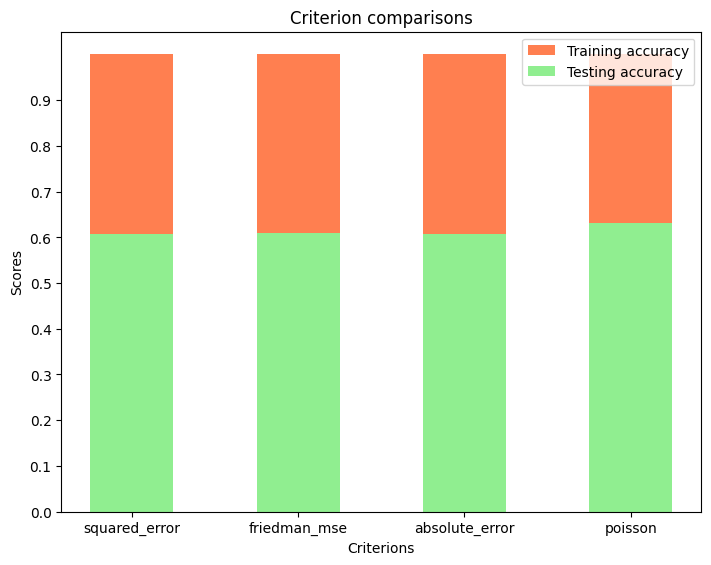

<Figure size 500x500 with 0 Axes>

In [621]:
accuracies= np.array(accuracies)
fig = plt.figure()
plt.figure(figsize=(5,5))
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('Criterions')
ax.set_ylabel('Scores')
ax.set_title('Criterion comparisons')
ax.set_yticks(np.arange(0, 1, 0.1))
ax.bar(criterions,accuracies[:,0],color='coral',width = 0.5, label = 'Training accuracy')
ax.bar(criterions,accuracies[:,1],color='lightgreen',width = 0.5, label = 'Testing accuracy')

ax.legend()


## Comparing accuracy for different maximum depths

In [622]:
depth_accuracies = []
depth = [2,5,6,7,8,9,10,15,20,30,40,50]
for d in depth:
    print("Depth is ", d)
    model = DecisionTreeRegressor(max_depth=d)
    print("Fitting the model")
    start = time.time()
    model.fit(X_train,y_train)
    end = time.time()
    print("Scoring the train data")
    train = model.score(X_train,y_train)
    print("Scoring the test data")
    test = model.score(X_test,y_test)
    lap = end - start
    depth_accuracies.append((train,test,lap))

Depth is  2
Fitting the model
Scoring the train data
Scoring the test data
Depth is  5
Fitting the model
Scoring the train data
Scoring the test data
Depth is  6
Fitting the model
Scoring the train data
Scoring the test data
Depth is  7
Fitting the model
Scoring the train data
Scoring the test data
Depth is  8
Fitting the model
Scoring the train data
Scoring the test data
Depth is  9
Fitting the model
Scoring the train data
Scoring the test data
Depth is  10
Fitting the model
Scoring the train data
Scoring the test data
Depth is  15
Fitting the model
Scoring the train data
Scoring the test data
Depth is  20
Fitting the model
Scoring the train data
Scoring the test data
Depth is  30
Fitting the model
Scoring the train data
Scoring the test data
Depth is  40
Fitting the model
Scoring the train data
Scoring the test data
Depth is  50
Fitting the model
Scoring the train data
Scoring the test data


<Figure size 640x480 with 0 Axes>

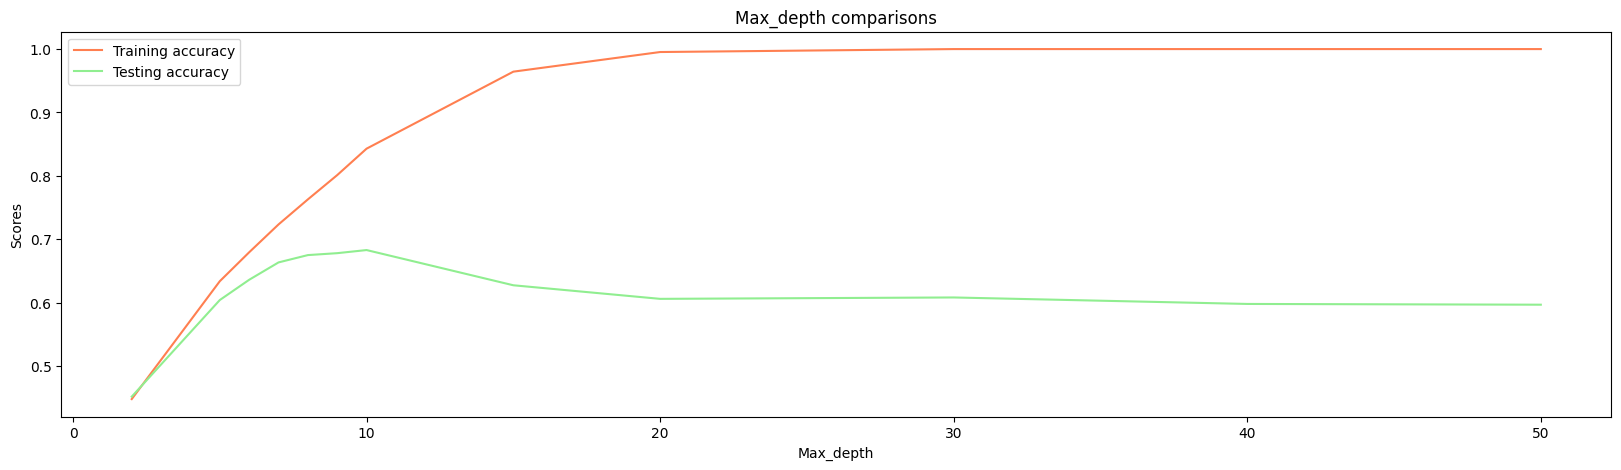

In [623]:
depth_accuracies = np.array(depth_accuracies)
fig = plt.figure()
plt.figure(figsize=(20,5))

plt.xlabel("Max_depth")
plt.ylabel("Scores")
plt.title("Max_depth comparisons")
plt.plot(depth,depth_accuracies[:,0],color='coral',label = 'Training accuracy')
plt.plot(depth,depth_accuracies[:,1],color='lightgreen',label = 'Testing accuracy')
plt.legend()

## Comparing accuracy for different maximum leaves values

In [633]:
leaves = [10,30,50,70,90,100,130,180,200,300,400,500]

leaf_accuracies=[]
for l in leaves:
    print("Max leaves is ", l)
    model = DecisionTreeRegressor(max_leaf_nodes = l)
    print("Fitting the model")
    start = time.time()
    model.fit(X_train,y_train)
    end = time.time()
    print("Scoring the train data")
    train = model.score(X_train,y_train)
    print("Scoring the test data")
    test = model.score(X_test,y_test)
    lap = end - start
    leaf_accuracies.append((train,test,lap))

Max leaves is  10
Fitting the model
Scoring the train data
Scoring the test data
Max leaves is  30
Fitting the model
Scoring the train data
Scoring the test data
Max leaves is  50
Fitting the model
Scoring the train data
Scoring the test data
Max leaves is  70
Fitting the model
Scoring the train data
Scoring the test data
Max leaves is  90
Fitting the model
Scoring the train data
Scoring the test data
Max leaves is  100
Fitting the model
Scoring the train data
Scoring the test data
Max leaves is  130
Fitting the model
Scoring the train data
Scoring the test data
Max leaves is  180
Fitting the model
Scoring the train data
Scoring the test data
Max leaves is  200
Fitting the model
Scoring the train data
Scoring the test data
Max leaves is  300
Fitting the model
Scoring the train data
Scoring the test data
Max leaves is  400
Fitting the model
Scoring the train data
Scoring the test data
Max leaves is  500
Fitting the model
Scoring the train data
Scoring the test data


<Figure size 640x480 with 0 Axes>

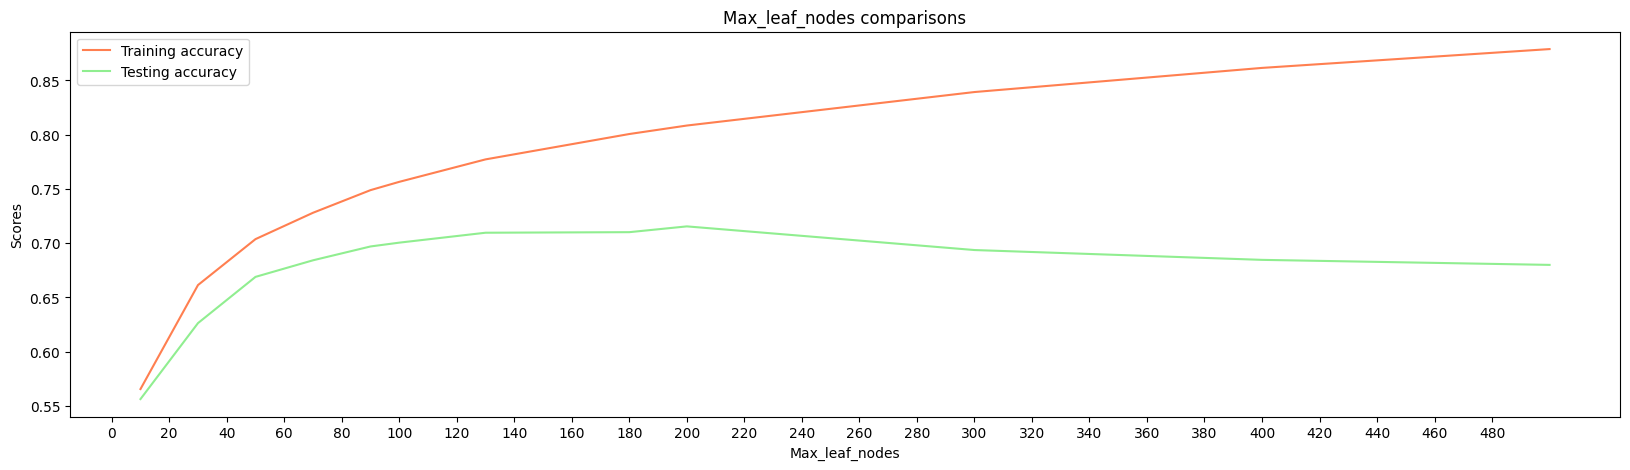

In [634]:
leaf_accuracies = np.array(leaf_accuracies)
fig = plt.figure()
plt.figure(figsize=(20,5))


plt.xlabel("Max_leaf_nodes")
plt.ylabel("Scores")
plt.title("Max_leaf_nodes comparisons")
plt.xticks(np.arange(0,500,20))
plt.plot(leaves,leaf_accuracies[:,0],color='coral',label = 'Training accuracy')
plt.plot(leaves,leaf_accuracies[:,1],color='lightgreen',label = 'Testing accuracy')
plt.legend()

## Hyperparameter tuning/Model Selection

In [614]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {'criterion':criterions, 'max_leaf_nodes':leaves,'max_depth':depth}
clf = RandomizedSearchCV(model, parameters, n_iter=300, cv=3, verbose=2)
clf.fit(X_train, y_train)
clf.best_params_



Fitting 3 folds for each of 300 candidates, totalling 900 fits
[CV] END criterion=squared_error, max_depth=9, max_leaf_nodes=70; total time=   0.0s
[CV] END criterion=squared_error, max_depth=9, max_leaf_nodes=70; total time=   0.0s
[CV] END criterion=squared_error, max_depth=9, max_leaf_nodes=70; total time=   0.0s
[CV] END criterion=squared_error, max_depth=15, max_leaf_nodes=130; total time=   0.0s
[CV] END criterion=squared_error, max_depth=15, max_leaf_nodes=130; total time=   0.0s
[CV] END criterion=squared_error, max_depth=15, max_leaf_nodes=130; total time=   0.0s
[CV] END criterion=squared_error, max_depth=40, max_leaf_nodes=200; total time=   0.0s
[CV] END criterion=squared_error, max_depth=40, max_leaf_nodes=200; total time=   0.0s
[CV] END criterion=squared_error, max_depth=40, max_leaf_nodes=200; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=10, max_leaf_nodes=180; total time=   2.1s
[CV] END criterion=absolute_error, max_depth=10, max_leaf_nodes=180; tot

[CV] END criterion=poisson, max_depth=10, max_leaf_nodes=400; total time=   0.0s
[CV] END criterion=squared_error, max_depth=8, max_leaf_nodes=400; total time=   0.0s
[CV] END criterion=squared_error, max_depth=8, max_leaf_nodes=400; total time=   0.0s
[CV] END criterion=squared_error, max_depth=8, max_leaf_nodes=400; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=30, max_leaf_nodes=200; total time=   2.4s
[CV] END criterion=absolute_error, max_depth=30, max_leaf_nodes=200; total time=   2.5s
[CV] END criterion=absolute_error, max_depth=30, max_leaf_nodes=200; total time=   2.4s
[CV] END criterion=squared_error, max_depth=30, max_leaf_nodes=90; total time=   0.0s
[CV] END criterion=squared_error, max_depth=30, max_leaf_nodes=90; total time=   0.0s
[CV] END criterion=squared_error, max_depth=30, max_leaf_nodes=90; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=50, max_leaf_nodes=200; total time=   2.4s
[CV] END criterion=absolute_error, max_depth=50, ma

[CV] END criterion=absolute_error, max_depth=9, max_leaf_nodes=180; total time=   2.2s
[CV] END criterion=absolute_error, max_depth=9, max_leaf_nodes=180; total time=   2.3s
[CV] END criterion=absolute_error, max_depth=9, max_leaf_nodes=180; total time=   2.3s
[CV] END criterion=squared_error, max_depth=9, max_leaf_nodes=90; total time=   0.0s
[CV] END criterion=squared_error, max_depth=9, max_leaf_nodes=90; total time=   0.0s
[CV] END criterion=squared_error, max_depth=9, max_leaf_nodes=90; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=7, max_leaf_nodes=30; total time=   2.1s
[CV] END criterion=absolute_error, max_depth=7, max_leaf_nodes=30; total time=   2.3s
[CV] END criterion=absolute_error, max_depth=7, max_leaf_nodes=30; total time=   2.3s
[CV] END .criterion=poisson, max_depth=2, max_leaf_nodes=180; total time=   0.0s
[CV] END .criterion=poisson, max_depth=2, max_leaf_nodes=180; total time=   0.0s
[CV] END .criterion=poisson, max_depth=2, max_leaf_nodes=180; to

[CV] END criterion=absolute_error, max_depth=20, max_leaf_nodes=130; total time=   2.5s
[CV] END criterion=absolute_error, max_depth=20, max_leaf_nodes=130; total time=   2.5s
[CV] END criterion=absolute_error, max_depth=40, max_leaf_nodes=90; total time=   2.3s
[CV] END criterion=absolute_error, max_depth=40, max_leaf_nodes=90; total time=   2.6s
[CV] END criterion=absolute_error, max_depth=40, max_leaf_nodes=90; total time=   2.5s
[CV] END criterion=friedman_mse, max_depth=7, max_leaf_nodes=10; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=7, max_leaf_nodes=10; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=7, max_leaf_nodes=10; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=40, max_leaf_nodes=50; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=40, max_leaf_nodes=50; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=40, max_leaf_nodes=50; total time=   0.0s
[CV] END criterion=squared_error, max_depth=30, max_leaf

[CV] END criterion=squared_error, max_depth=10, max_leaf_nodes=500; total time=   0.0s
[CV] END ..criterion=poisson, max_depth=9, max_leaf_nodes=70; total time=   0.0s
[CV] END ..criterion=poisson, max_depth=9, max_leaf_nodes=70; total time=   0.0s
[CV] END ..criterion=poisson, max_depth=9, max_leaf_nodes=70; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=6, max_leaf_nodes=70; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=6, max_leaf_nodes=70; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=6, max_leaf_nodes=70; total time=   0.0s
[CV] END .criterion=poisson, max_depth=20, max_leaf_nodes=30; total time=   0.0s
[CV] END .criterion=poisson, max_depth=20, max_leaf_nodes=30; total time=   0.0s
[CV] END .criterion=poisson, max_depth=20, max_leaf_nodes=30; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=9, max_leaf_nodes=90; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=9, max_leaf_nodes=90; total time=   0.0s
[CV] EN

[CV] END criterion=absolute_error, max_depth=5, max_leaf_nodes=10; total time=   1.9s
[CV] END criterion=absolute_error, max_depth=5, max_leaf_nodes=10; total time=   2.1s
[CV] END criterion=absolute_error, max_depth=5, max_leaf_nodes=10; total time=   2.0s
[CV] END .criterion=poisson, max_depth=40, max_leaf_nodes=50; total time=   0.0s
[CV] END .criterion=poisson, max_depth=40, max_leaf_nodes=50; total time=   0.0s
[CV] END .criterion=poisson, max_depth=40, max_leaf_nodes=50; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=20, max_leaf_nodes=90; total time=   2.2s
[CV] END criterion=absolute_error, max_depth=20, max_leaf_nodes=90; total time=   2.4s
[CV] END criterion=absolute_error, max_depth=20, max_leaf_nodes=90; total time=   2.4s
[CV] END criterion=absolute_error, max_depth=6, max_leaf_nodes=180; total time=   2.1s
[CV] END criterion=absolute_error, max_depth=6, max_leaf_nodes=180; total time=   2.3s
[CV] END criterion=absolute_error, max_depth=6, max_leaf_nodes=1

[CV] END criterion=poisson, max_depth=10, max_leaf_nodes=180; total time=   0.0s
[CV] END criterion=poisson, max_depth=10, max_leaf_nodes=180; total time=   0.0s
[CV] END criterion=poisson, max_depth=10, max_leaf_nodes=180; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=2, max_leaf_nodes=500; total time=   1.2s
[CV] END criterion=absolute_error, max_depth=2, max_leaf_nodes=500; total time=   1.2s
[CV] END criterion=absolute_error, max_depth=2, max_leaf_nodes=500; total time=   1.2s
[CV] END criterion=poisson, max_depth=20, max_leaf_nodes=130; total time=   0.0s
[CV] END criterion=poisson, max_depth=20, max_leaf_nodes=130; total time=   0.0s
[CV] END criterion=poisson, max_depth=20, max_leaf_nodes=130; total time=   0.0s
[CV] END criterion=poisson, max_depth=30, max_leaf_nodes=400; total time=   0.0s
[CV] END criterion=poisson, max_depth=30, max_leaf_nodes=400; total time=   0.0s
[CV] END criterion=poisson, max_depth=30, max_leaf_nodes=400; total time=   0.0s
[CV] END c

[CV] END .criterion=poisson, max_depth=8, max_leaf_nodes=300; total time=   0.0s
[CV] END .criterion=poisson, max_depth=8, max_leaf_nodes=300; total time=   0.0s
[CV] END .criterion=poisson, max_depth=8, max_leaf_nodes=300; total time=   0.0s
[CV] END criterion=absolute_error, max_depth=30, max_leaf_nodes=130; total time=   2.2s
[CV] END criterion=absolute_error, max_depth=30, max_leaf_nodes=130; total time=   2.5s
[CV] END criterion=absolute_error, max_depth=30, max_leaf_nodes=130; total time=   2.5s
[CV] END criterion=squared_error, max_depth=8, max_leaf_nodes=500; total time=   0.0s
[CV] END criterion=squared_error, max_depth=8, max_leaf_nodes=500; total time=   0.0s
[CV] END criterion=squared_error, max_depth=8, max_leaf_nodes=500; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, max_leaf_nodes=50; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, max_leaf_nodes=50; total time=   0.0s
[CV] END criterion=squared_error, max_depth=5, max_leaf_nodes=50;

[CV] END criterion=friedman_mse, max_depth=20, max_leaf_nodes=50; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=20, max_leaf_nodes=50; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=2, max_leaf_nodes=180; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=2, max_leaf_nodes=180; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=2, max_leaf_nodes=180; total time=   0.0s
[CV] END .criterion=poisson, max_depth=7, max_leaf_nodes=200; total time=   0.0s
[CV] END .criterion=poisson, max_depth=7, max_leaf_nodes=200; total time=   0.0s
[CV] END .criterion=poisson, max_depth=7, max_leaf_nodes=200; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=30, max_leaf_nodes=500; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=30, max_leaf_nodes=500; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=30, max_leaf_nodes=500; total time=   0.0s
[CV] END ..criterion=poisson, max_depth=5, max_leaf_nodes=50; total time= 

[CV] END criterion=friedman_mse, max_depth=2, max_leaf_nodes=50; total time=   0.0s
[CV] END ..criterion=poisson, max_depth=9, max_leaf_nodes=30; total time=   0.0s
[CV] END ..criterion=poisson, max_depth=9, max_leaf_nodes=30; total time=   0.0s
[CV] END ..criterion=poisson, max_depth=9, max_leaf_nodes=30; total time=   0.0s
[CV] END criterion=squared_error, max_depth=7, max_leaf_nodes=30; total time=   0.0s
[CV] END criterion=squared_error, max_depth=7, max_leaf_nodes=30; total time=   0.0s
[CV] END criterion=squared_error, max_depth=7, max_leaf_nodes=30; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=15, max_leaf_nodes=30; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=15, max_leaf_nodes=30; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=15, max_leaf_nodes=30; total time=   0.0s
[CV] END .criterion=poisson, max_depth=30, max_leaf_nodes=70; total time=   0.0s
[CV] END .criterion=poisson, max_depth=30, max_leaf_nodes=70; total time=   0.0s
[

{'max_leaf_nodes': 180, 'max_depth': 20, 'criterion': 'poisson'}

In [625]:
modelss = DecisionTreeRegressor(max_leaf_nodes= 180, max_depth=20, criterion='poisson')
modelss.fit(X_train,y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=20, max_leaf_nodes=180)

In [649]:
modelss.score(X_test,y_test)

0.7190548324314379

In [667]:
modelss.score(X_train,y_train)

0.7961701036503335

## Visualising the Decision Tree

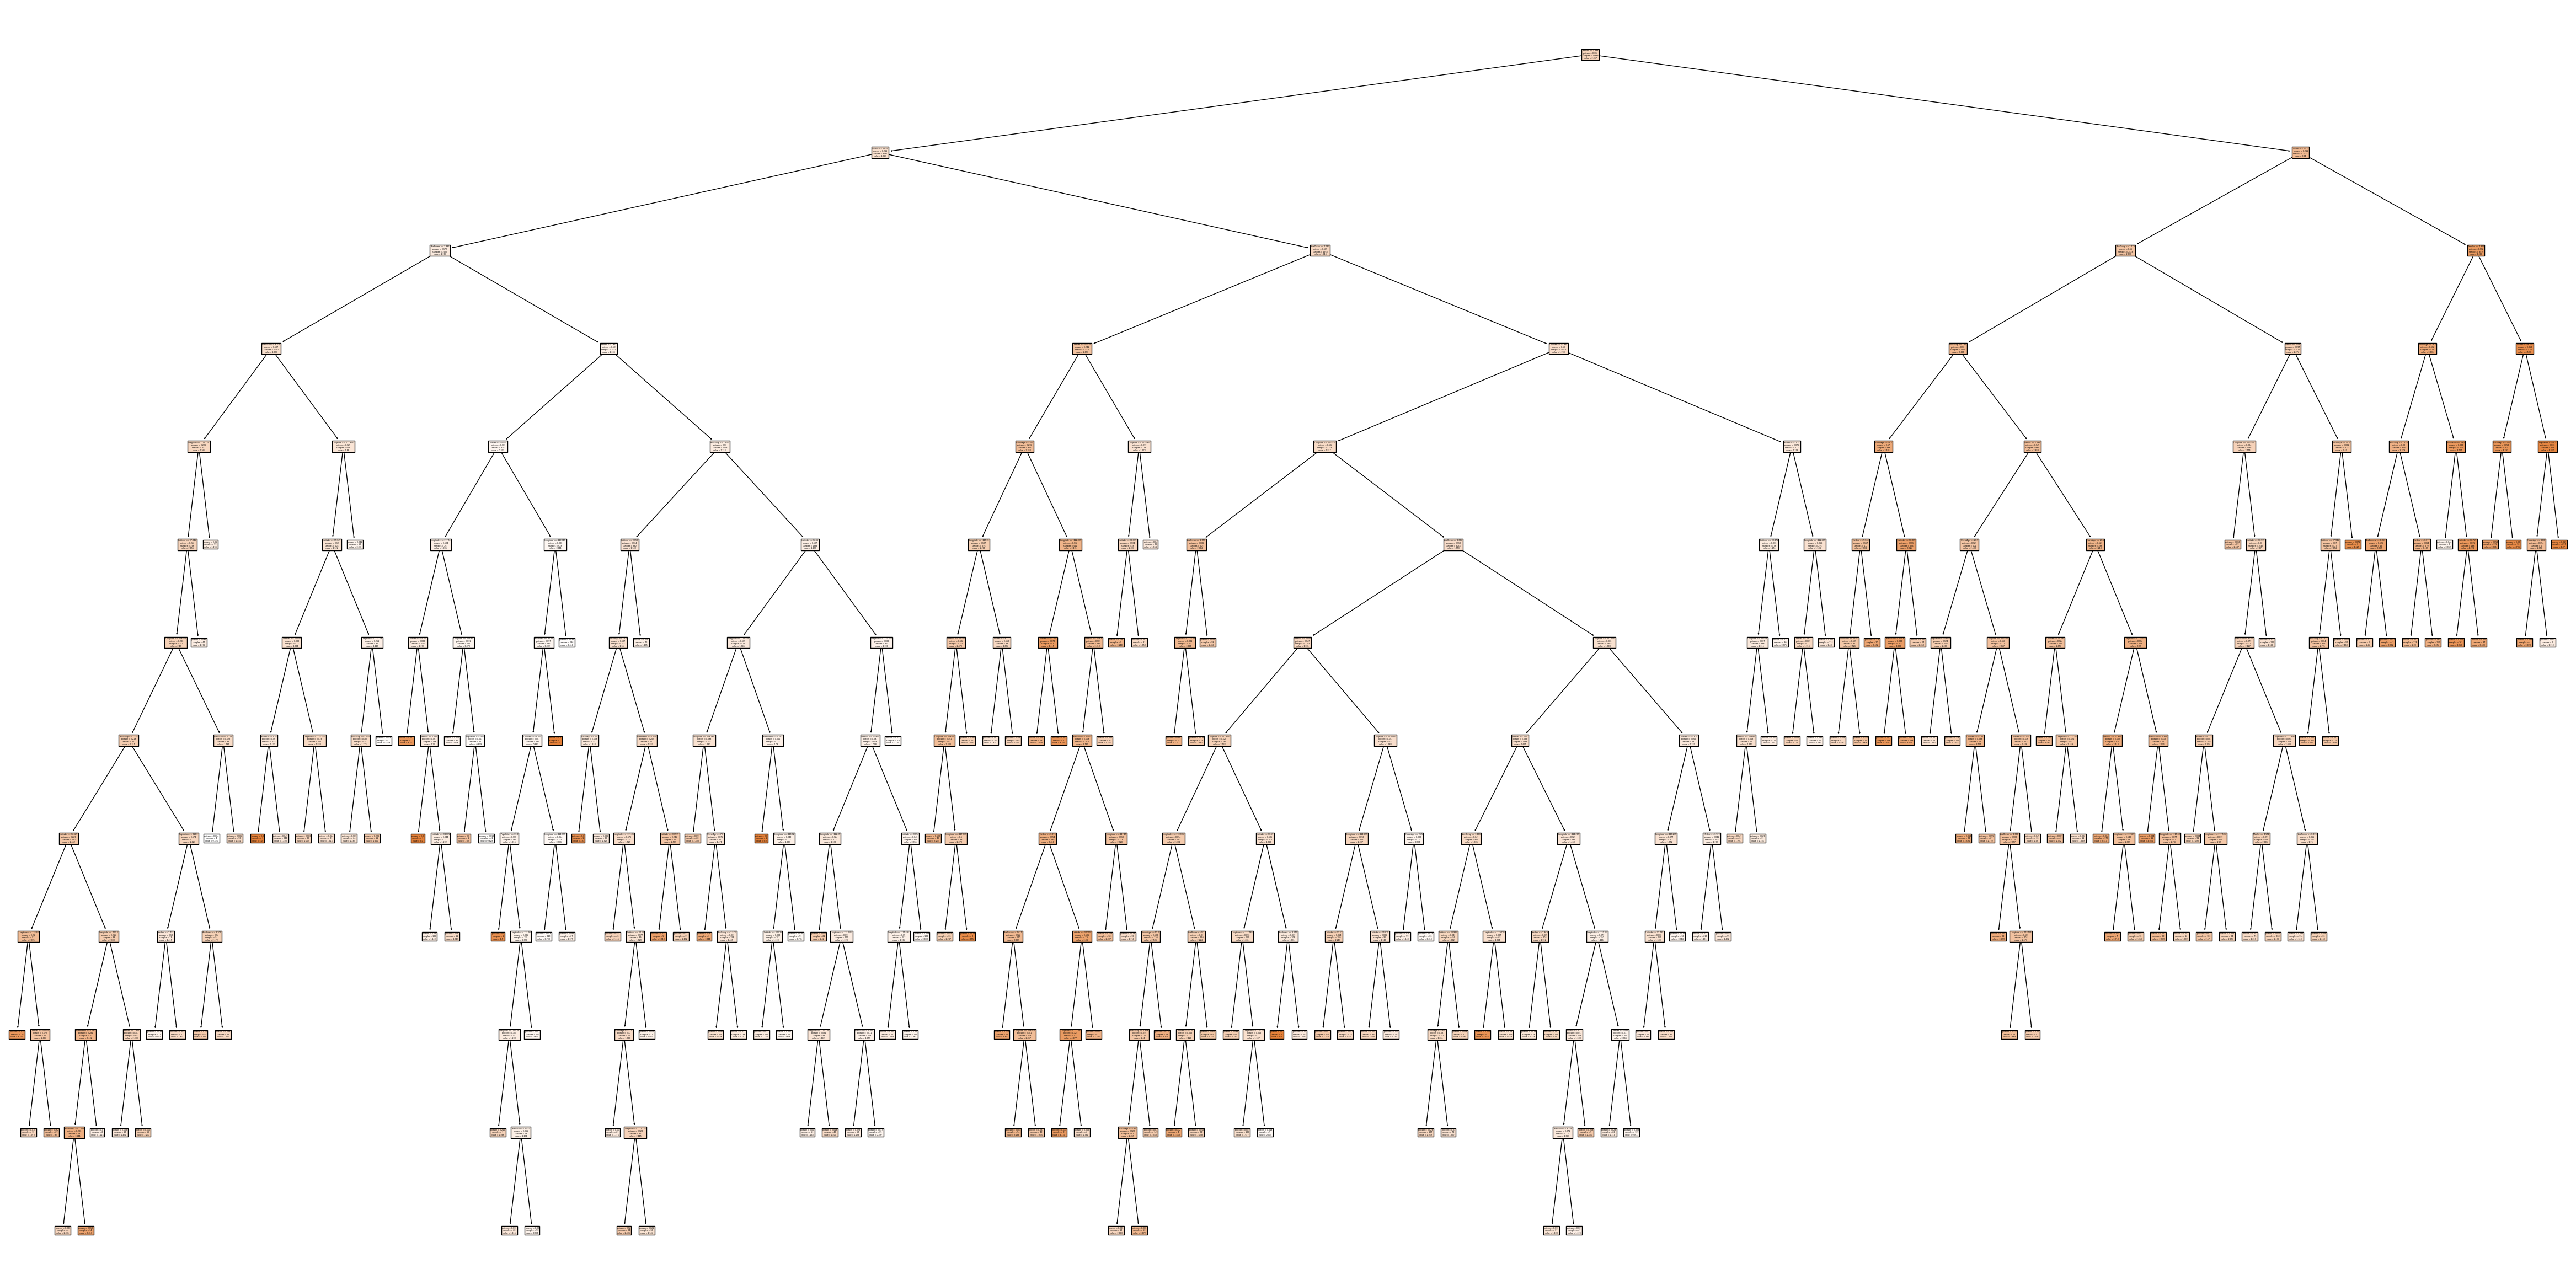

In [626]:
#code taken from lab 7
from sklearn import tree
fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(modelss, 
                   feature_names=feature_names,  
                   class_names=newY,
                   filled=True)

plt.savefig('tree.pdf',format='pdf',bbox_inches = "tight")

## Comparing fit time for different criterions

<BarContainer object of 4 artists>

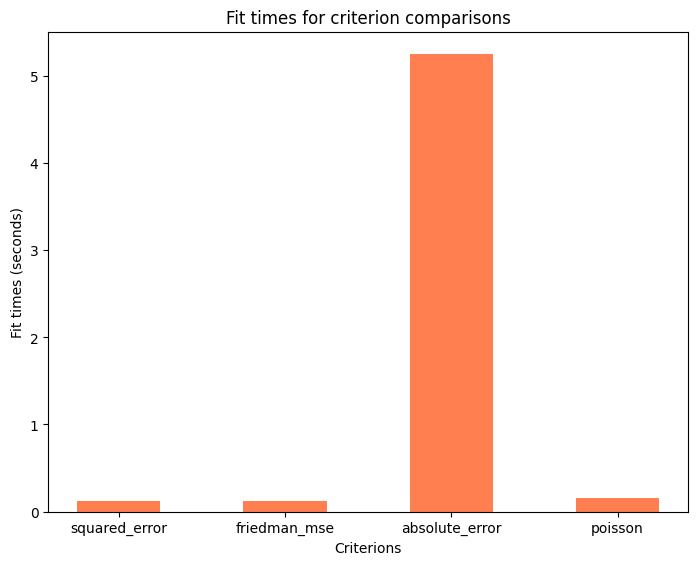

<Figure size 300x300 with 0 Axes>

In [627]:
fig = plt.figure()
plt.figure(figsize=(3,3))
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('Criterions')
ax.set_ylabel('Fit times (seconds)')
ax.set_title('Fit times for criterion comparisons')
ax.set_yticks(np.arange(0, 10, 1))
ax.bar(criterions,accuracies[:,2],color='coral',width = 0.5)

## Comparing fit times for different maximum leaves

<Figure size 640x480 with 0 Axes>

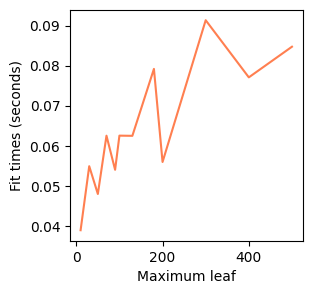

In [635]:
fig = plt.figure()
plt.figure(figsize=(3,3))
plt.xlabel('Maximum leaf')
plt.ylabel('Fit times (seconds)')
plt.plot(leaves,leaf_accuracies[:,2],color='coral',label = 'Training accuracy')

## Comparing fit times for different maximum depth values

<Figure size 640x480 with 0 Axes>

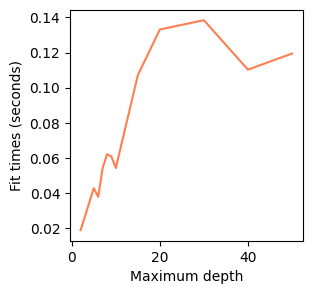

In [636]:
fig = plt.figure()
plt.figure(figsize=(3,3))
plt.xlabel('Maximum depth')
plt.ylabel('Fit times (seconds)')
plt.plot(depth,depth_accuracies[:,2],color='coral',label = 'Training accuracy')

## Checking for a wrongly predicted value

In [744]:
#Prediction vs actual value
print(modelss.predict(X[1].reshape(1,-1)),y[1])

[3.97083643] 3.585


In [576]:
california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Med_House_Val
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


C:\Users\Tudor\AppData\Local\Temp\ipykernel_175340\4117875591.py:6: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[1,7],X[1,6],s=1000,c='dodgerblue',marker='x', edgecolors='k')


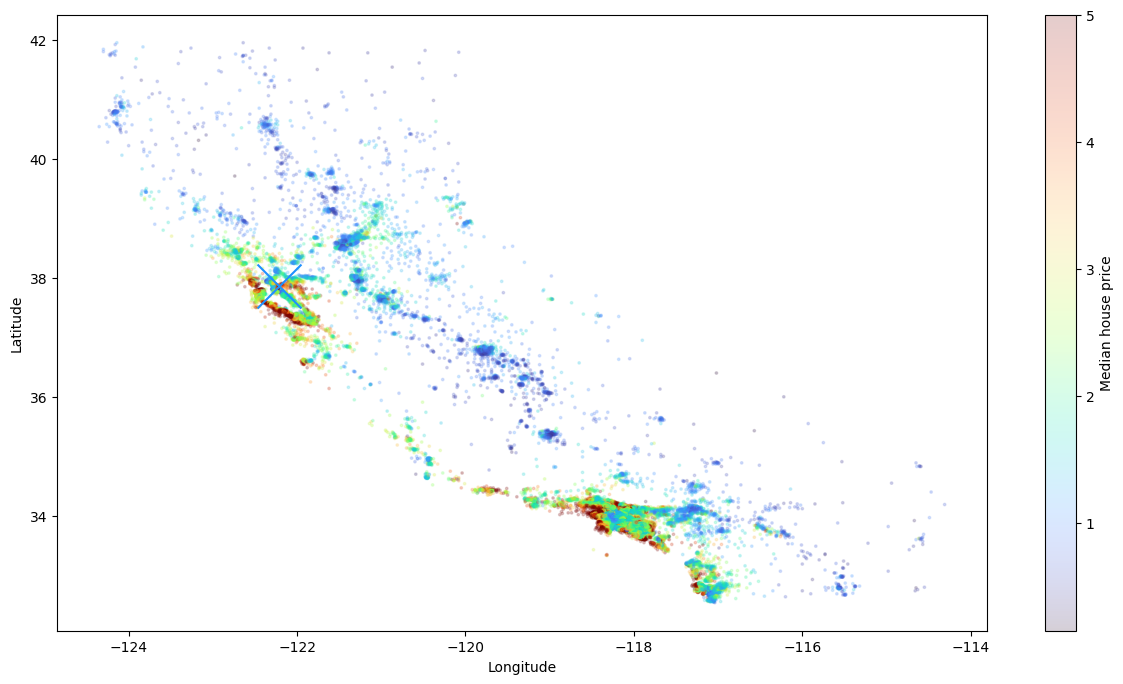

In [738]:
plt.figure(figsize=(15, 8))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.scatter(california.Longitude,california.Latitude, c = y, s = 3,cmap='turbo',alpha=0.2)
plt.colorbar().set_label('Median house price')
plt.scatter(X[1,7],X[1,6],s=1000,c='dodgerblue',marker='x', edgecolors='k')

## Random Forests

In [722]:
## Testing a random forest with 30 models
forest = RandomForestRegressor(n_estimators = 30, criterion = 'poisson',max_leaf_nodes= 180, max_depth=20)
forest.fit(X_train,y_train)

RandomForestRegressor(criterion='poisson', max_depth=20, max_leaf_nodes=180,
                      n_estimators=30)

In [737]:
forest.score(X_test,y_test)


0.7655337606584964

## Testing how the ensemble is affected by the number of models

In [716]:
def rand_forest(model_no):
    scorings = []
    for i in range(2, model_no):
        forests = RandomForestRegressor(n_estimators = i, max_leaf_nodes= 180, max_depth=20,criterion = 'poisson')
        print("Fitting %d models"%i)
        start = time.time()
        forests.fit(X_train,y_train)
        end = time.time()
        print('Fitting done')
        train = forests.score(X_train,y_train)
        print('Done scoring the training data')
        test = forests.score(X_test,y_test)
        print('Done scoring the test data')
        lap = end - start
        scorings.append((i,train,test,lap))
    return scorings

In [717]:
scorings = rand_forest(70)

Fitting 2 models
Fitting done
Done scoring the training data
Done scoring the test data
Fitting 3 models
Fitting done
Done scoring the training data
Done scoring the test data
Fitting 4 models
Fitting done
Done scoring the training data
Done scoring the test data
Fitting 5 models
Fitting done
Done scoring the training data
Done scoring the test data
Fitting 6 models
Fitting done
Done scoring the training data
Done scoring the test data
Fitting 7 models
Fitting done
Done scoring the training data
Done scoring the test data
Fitting 8 models
Fitting done
Done scoring the training data
Done scoring the test data
Fitting 9 models
Fitting done
Done scoring the training data
Done scoring the test data
Fitting 10 models
Fitting done
Done scoring the training data
Done scoring the test data
Fitting 11 models
Fitting done
Done scoring the training data
Done scoring the test data
Fitting 12 models
Fitting done
Done scoring the training data
Done scoring the test data
Fitting 13 models
Fitting don

In [718]:
scorings = np.array(scorings)
print(scorings[:,3])

[0.12015724 0.18331933 0.23175764 0.33560944 0.39516449 0.47960567
 0.48101258 0.51408219 0.58068466 0.63034868 0.69674253 0.74507475
 0.81486249 0.86371446 0.93028998 0.9654212  1.04238129 1.08353949
 1.17721653 1.22303271 1.25848436 1.31535578 1.38040304 1.44447231
 1.48186922 1.56017423 1.61533713 1.69532871 1.73055029 1.78267574
 1.82656598 1.8690002  1.93297935 2.0130651  2.04867315 2.1133306
 2.16639447 2.22971439 2.28008676 2.34865451 2.39951396 2.44839501
 2.52871585 2.5830214  2.61623669 2.68161917 2.74683285 2.79823041
 2.8494854  2.91421628 2.96585822 2.99802256 3.0818305  3.14955974
 3.26212168 3.25075102 3.28344369 3.42135024 3.44987988 3.46080947
 3.5299542  3.6169548  3.64923668 3.71509933 3.74858856 3.81531453
 3.87121058 3.93029475]


<Figure size 640x480 with 0 Axes>

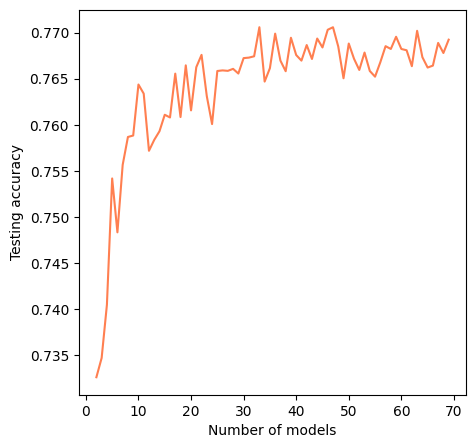

In [719]:
fig = plt.figure()
plt.figure(figsize=(5,5))
plt.xlabel('Number of models')
plt.ylabel('Testing accuracy')
plt.plot(scorings[:,0],scorings[:,2],color='coral',label = 'Test accuracy')

<Figure size 640x480 with 0 Axes>

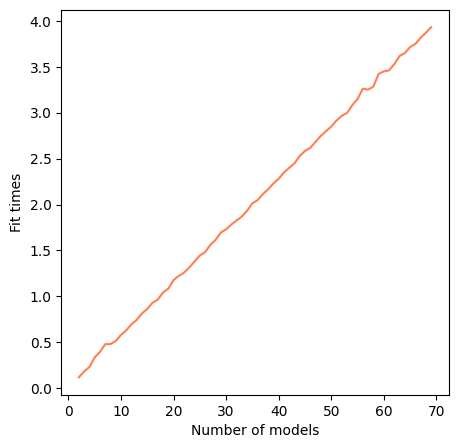

In [721]:
fig = plt.figure()
plt.figure(figsize=(5,5))
plt.xlabel('Number of models')
plt.ylabel('Fit times')
plt.plot(scorings[:,0],scorings[:,3],color='coral')

## Creating the random forest with the optimal number of models

In [728]:
rand_forest = RandomForestRegressor(n_estimators = 30, max_leaf_nodes= 180, max_depth=20,criterion = 'poisson')
rand_forest.fit(X_train,y_train)
accuracy = rand_forest.score(X_test,y_test)


In [745]:
print(rand_forest.score(X_train,y_train))

0.8327203147514894


## Scoring linear regression

In [653]:
#Adapted from https://stats.stackexchange.com/questions/452640/implementing-bayesian-linear-regression-using-pymc3
y_est = pm.summary(iidata).loc['w0','mean'] + pm.summary(iidata).loc['w1','mean']*X_scaled.MedInc + pm.summary(iidata).loc['w2','mean']*X_scaled.HouseAge + pm.summary(iidata).loc['w3','mean']*X_scaled.AveRooms + pm.summary(iidata).loc['w4','mean'] *X_scaled.AveBedrms + pm.summary(iidata).loc['w5','mean'] * X_scaled.Population+pm.summary(iidata).loc['w6','mean']*X_scaled.AveOccup + pm.summary(iidata).loc['w7','mean']*X_scaled.Latitude + pm.summary(iidata).loc['w8','mean']*X_scaled.Longitude


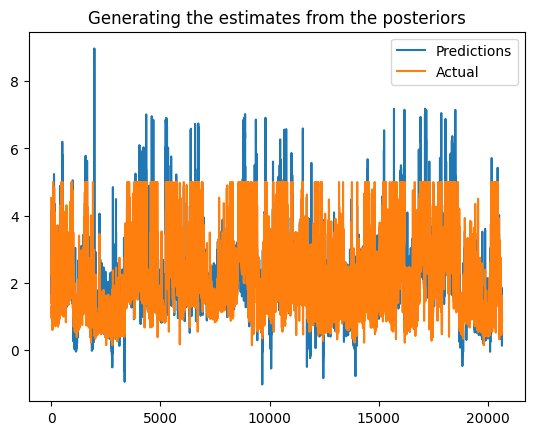

In [654]:
plt.title('Generating the estimates from the posteriors')
plt.plot(y_est, label='Predictions')
plt.plot(newY, label='Actual')
plt.legend()

In [655]:
#Code taken from first lab
from sklearn.metrics import mean_squared_error

RMSE_test = np.sqrt(mean_squared_error(newY,y_est))
print('Test RMSE: ', round(RMSE_test,2))

Test RMSE:  0.72


## Comparing Decision Tree with Random Forest and MCMC

In [729]:
model_types=['Decision Tree', 'Random Forest', 'Linear Regression']
model_acc = [modelss.score(X_test,y_test),accuracy,RMSE_test]

<BarContainer object of 3 artists>

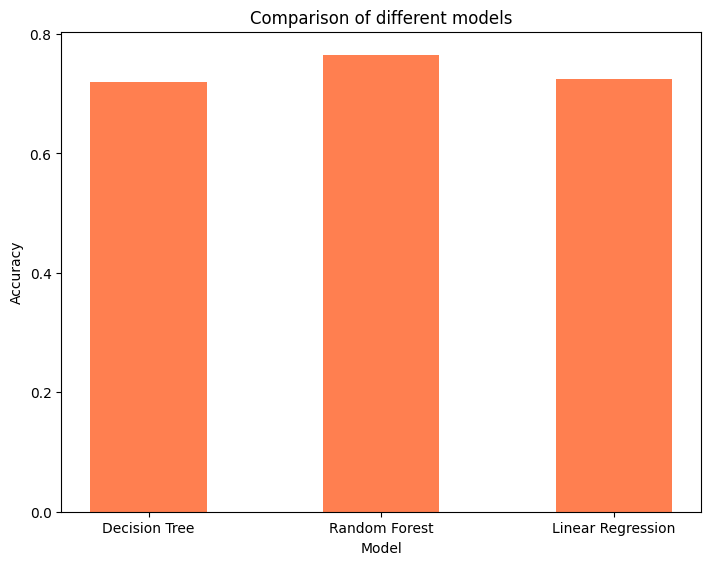

In [730]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of different models')
ax.set_yticks(np.arange(0, 1, 0.2))
ax.bar(model_types,model_acc,color='coral',width = 0.5)